   Data.Precipitation Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  1/3/2016           1             3       2016   
1                0.00  1/3/2016           1             3       2016   
2                0.16  1/3/2016           1             3       2016   
3                0.00  1/3/2016           1             3       2016   
4                0.01  1/3/2016           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2                

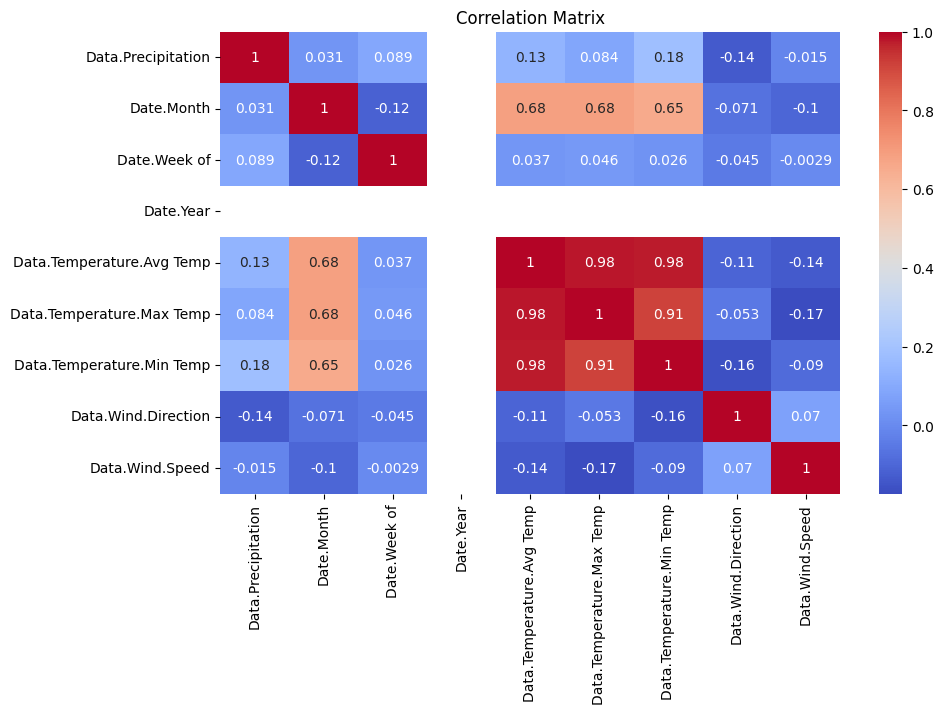

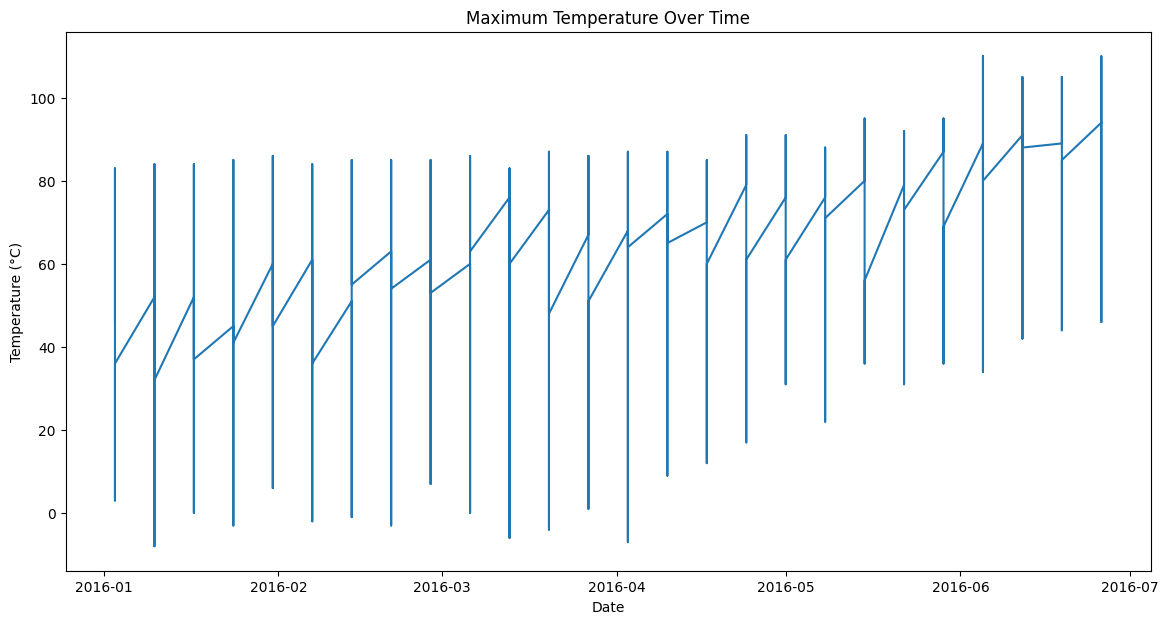

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load weather data from a CSV file
data = pd.read_csv('/content/historical_temperature_data.csv')

# Display the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Convert the 'Date.Full' column to datetime
data['Date.Full'] = pd.to_datetime(data['Date.Full'])

# Rename columns for easier reference (if necessary)
# For example: data.rename(columns={'Data.Temperature.Avg Temp': 'Temperature'}, inplace=True)

# Correlation matrix to understand the relationships between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time series analysis: Plot temperature over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date.Full'], data['Data.Temperature.Max Temp'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


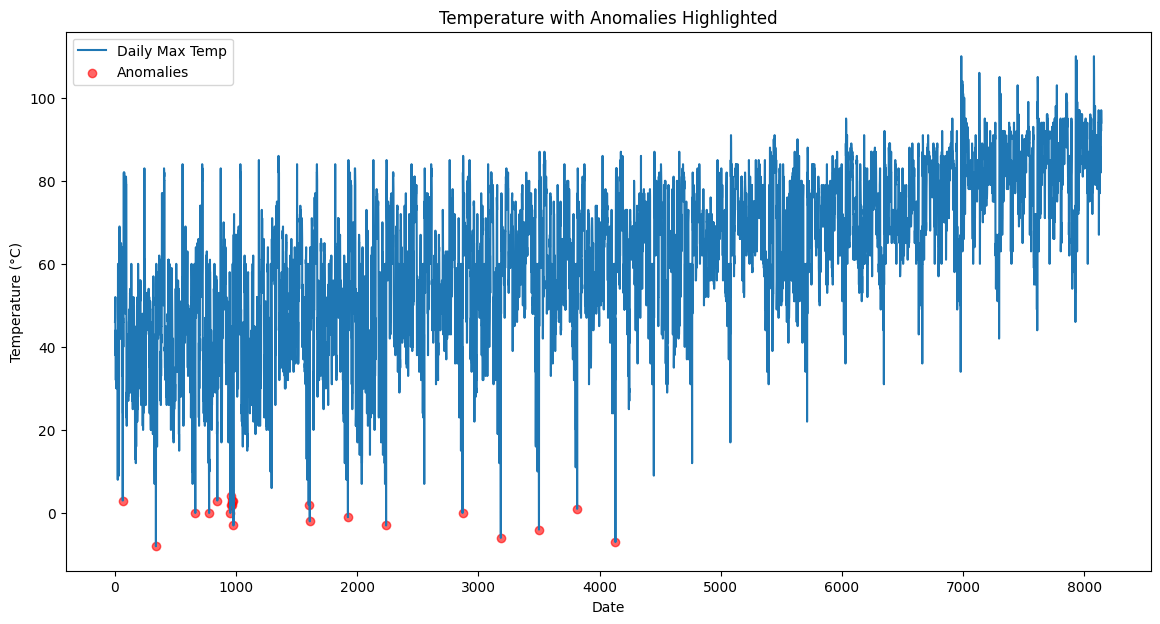

In [ ]:
from scipy import stats

# Calculate z-scores for temperature
data['Temperature_Z'] = stats.zscore(data['Data.Temperature.Max Temp'])

# Filter out anomalies (e.g., z-score > 3 or < -3)
anomalies = data[np.abs(data['Temperature_Z']) > 3]

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Data.Temperature.Max Temp'], label='Daily Max Temp')
plt.scatter(anomalies.index, anomalies['Data.Temperature.Max Temp'], color='red', label='Anomalies', alpha=0.6)
plt.title('Temperature with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


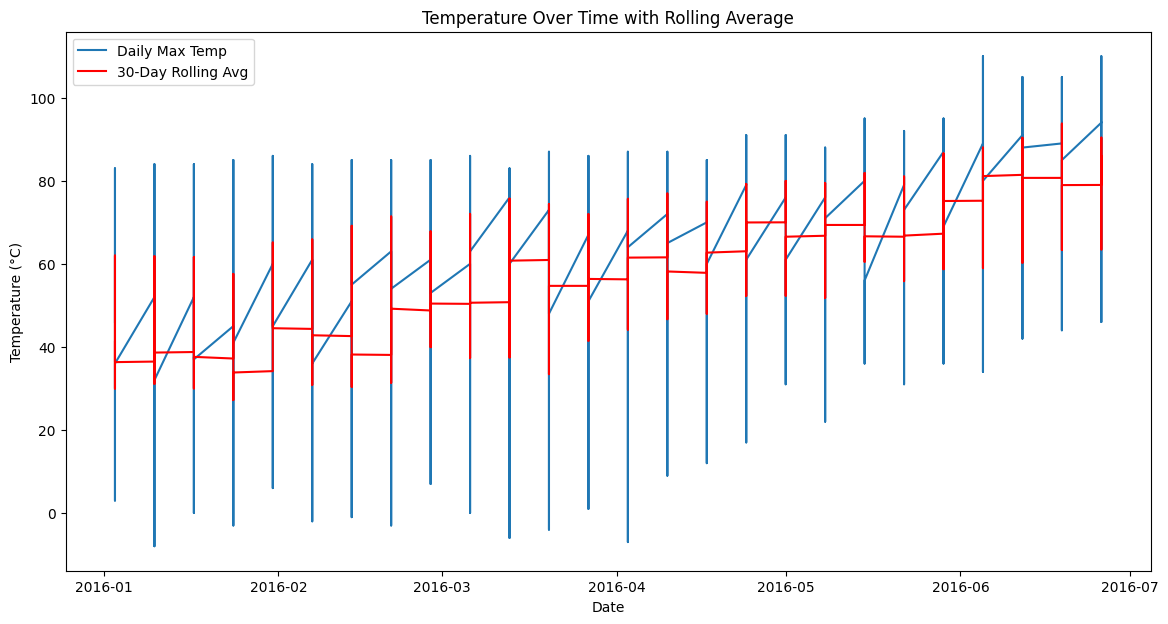

In [ ]:
data.set_index('Date.Full', inplace=True)
data['Rolling_Max_Temperature'] = data['Data.Temperature.Max Temp'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Data.Temperature.Max Temp'], label='Daily Max Temp')
plt.plot(data.index, data['Rolling_Max_Temperature'], color='red', label='30-Day Rolling Avg')
plt.title('Temperature Over Time with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


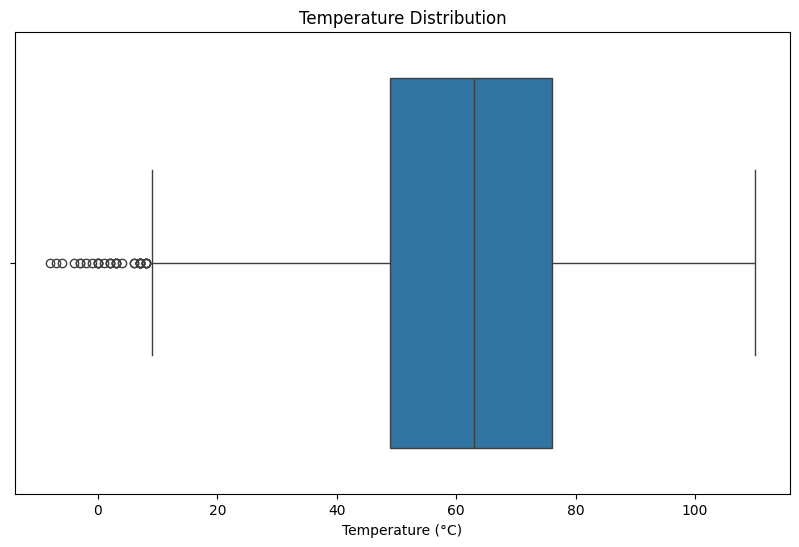

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Data.Temperature.Max Temp'])
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()


In [ ]:
print(data.index.min(), data.index.max())


2016-01-03 00:00:00 2016-06-26 00:00:00


In [ ]:
# Display the column names to verify their names in the dataset
print("Column Names in Dataset:\n", data.columns)

Column Names in Dataset:
 Index(['Data.Precipitation', 'Date.Month', 'Date.Week of', 'Date.Year',
       'Station.City', 'Station.Code', 'Station.Location', 'Station.State',
       'Data.Temperature.Avg Temp', 'Data.Temperature.Max Temp',
       'Data.Temperature.Min Temp', 'Data.Wind.Direction', 'Data.Wind.Speed',
       'Temperature_Z', 'Rolling_Max_Temperature'],
      dtype='object')


Data Head:
    Data.Precipitation Date.Full  Date.Month  Date.Week of  Date.Year  \
0                0.00  1/3/2016           1             3       2016   
1                0.00  1/3/2016           1             3       2016   
2                0.16  1/3/2016           1             3       2016   
3                0.00  1/3/2016           1             3       2016   
4                0.01  1/3/2016           1             3       2016   

  Station.City Station.Code Station.Location Station.State  \
0   Birmingham          BHM   Birmingham, AL       Alabama   
1   Huntsville          HSV   Huntsville, AL       Alabama   
2       Mobile          MOB       Mobile, AL       Alabama   
3   Montgomery          MGM   Montgomery, AL       Alabama   
4    Anchorage          ANC    Anchorage, AK        Alaska   

   Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
0                         39                         46   
1                         39                         47   
2    

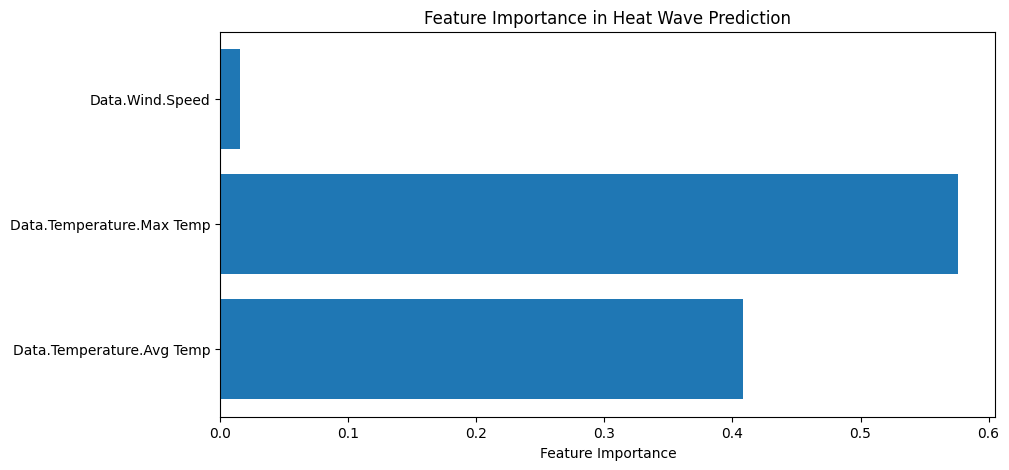

Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Stay indoors and stay hydrated.
Heat wave alert! Sta

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the data
file_path = '/content/historical_temperature_data.csv'
data = pd.read_csv(file_path)

# Step 3: Explore the data (optional)
print("Data Head:\n", data.head())
print("Data Description:\n", data.describe())
print("Data Info:\n", data.info())

# Step 4: Data Preprocessing
# Check for missing values
print("Missing Values:\n", data.isnull().sum())
data = data.dropna()
print("Data shape after handling missing values:", data.shape)

# Step 5: Feature Selection and Define Target Variable
# Define heat_wave based on temperature threshold
temperature_threshold = 35  # Set your desired threshold for heat wave
data['heat_wave'] = (data['Data.Temperature.Max Temp'] > temperature_threshold).astype(int)

X = data[['Data.Temperature.Avg Temp', 'Data.Temperature.Max Temp', 'Data.Wind.Speed']]
y = data['heat_wave']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Feature Importance (Optional)
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Heat Wave Prediction")
plt.show()

# Step 10: Alert Simulation
def send_alert():
    print("Heat wave alert! Stay indoors and stay hydrated.")

# Step 11: Generate alerts based on prediction probabilities
for i, prob in enumerate(model.predict_proba(X_test)):
    if prob[1] > 0.8:  # Assuming heat wave class is index 1
        send_alert()

